In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import Evaluation_Attributes as Darwin 
import Data_Operation as DO

# Transform Data to A Standard Format

In [2]:
DO.Transformation(folder_path='Moderate_risk').Do


[========================================] 100%

In [3]:
DO.Transformation(folder_path='High_risk').Do


[========================================] 100%

# Get Test Trader Data

In [2]:
test_data = DO.Preparation(folder_path='Test_trader_data').Get.loc[0:4000,:]
test_data

,Time,Type,Volume,Symbol,Price,S/L,T/P,Time,Price,Commission,Swap,Profit,Comment
0,2018-06-03 11:26:32,Balance,0.00,0,0.00000,0,0.00000,0,0.00000,0.00,0.00,512.51,Deposit
1,2018-06-04 15:15:03,Sell,0.01,AUDCAD,0.98926,0,0.98630,2018-06-06 15:00:22,0.98744,-0.08,-0.02,1.41,0
2,2018-06-05 17:15:00,Sell,0.01,AUDCAD,0.99145,0,0.98506,2018-06-06 15:15:00,0.98632,-0.08,-0.01,3.91,0
3,2018-06-05 17:00:05,Sell,0.01,AUDCAD,0.99051,0,0.98783,2018-06-07 23:58:12,0.98783,-0.08,-0.05,2.09,[tp]
4,2018-06-06 20:15:03,Sell,0.01,AUDCAD,0.99184,0,0.98459,2018-06-08 11:30:35,0.98630,-0.08,-0.05,4.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,2021-11-24 12:00:03,Buy,0.08,EURUSD,1.12071,0,1.12512,2021-11-26 10:20:54,1.12512,-0.45,-1.68,35.28,0
3997,2021-11-24 16:15:02,Buy,0.08,EURUSD,1.11928,0,1.12556,2021-11-26 10:21:23,1.12559,-0.45,-1.68,50.48,0
3998,2021-11-25 16:45:03,Buy,0.25,NZDCAD,0.86633,0,0.86866,2021-11-26 10:24:14,0.86866,-0.86,-0.86,45.64,0
3999,2021-11-25 08:30:02,Buy,0.25,NZDCAD,0.86886,0,0.86911,2021-11-26 10:35:14,0.86913,-0.86,-0.86,5.29,0


# Get Market Data 

In [3]:
from Data_Operation import Market_Data , OpenClose_data

In [4]:
ETHUSD = Market_Data(
    Symbol='AUDCAD',
    Start_Date= "2022-01-01T00:00:00.000",
    End_Data="2022-01-01T00:00:00.000",
    Interval="1H"
).send_post_request

In [5]:
ETHUSD

,time,open,high,low,close,volume
0,2022-01-01,0.9178,0.9178,0.9178,0.9178,0


In [6]:
open_close = OpenClose_data(
    Symbol='ETHUSD',
    Start_Date= "2022-01-01T00:00:00.000",
    End_Data="2022-02-01T00:00:00.000",
).send_post_request

In [7]:
open_close

,candlewindow,utctime,close
0,-50% (start),2021-12-16 12:00:00,4067.5
1,-40% (start),2021-12-19 14:24:00,3934.3
2,-30% (start),2021-12-22 16:48:00,4004.2
3,-20% (start),2021-12-25 19:12:00,4073.2
4,-10% (start),2021-12-28 21:36:00,3825.2
5,(start),2022-01-01 00:00:00,3743.9
6,+10% (start),2022-01-04 02:24:00,3724.1
7,+20% (start),2022-01-07 04:48:00,3197.1
8,+30% (start),2022-01-10 07:12:00,3164.6
9,+40% (start),2022-01-13 09:36:00,3367.8


# Duration

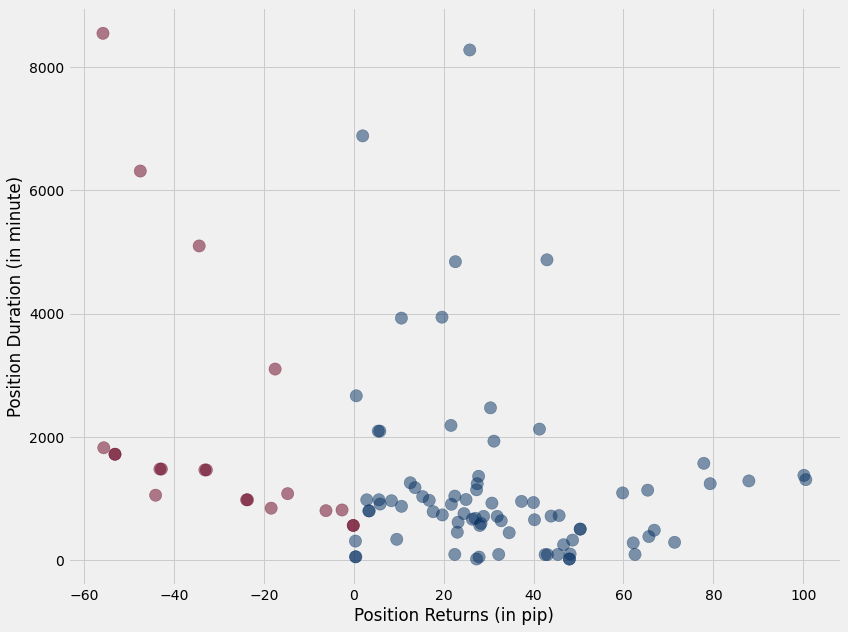

In [12]:
Duration = Darwin.Duration(data=test_data)

plt.figure(figsize=(12,9))
Duration.plot
plt.show()

In [10]:
Duration.Duration_data

,Position Duration (in minute),Position Returns (in pip)
0,55.38,27.879385
1,94.77,42.567022
2,94.83,43.092150
3,97.88,45.399738
4,105.00,48.125819
...,...,...
94,8547.78,-55.802807
95,8277.78,25.807328
96,1035.00,15.338699
97,2097.72,5.441901


# R_plus_minus

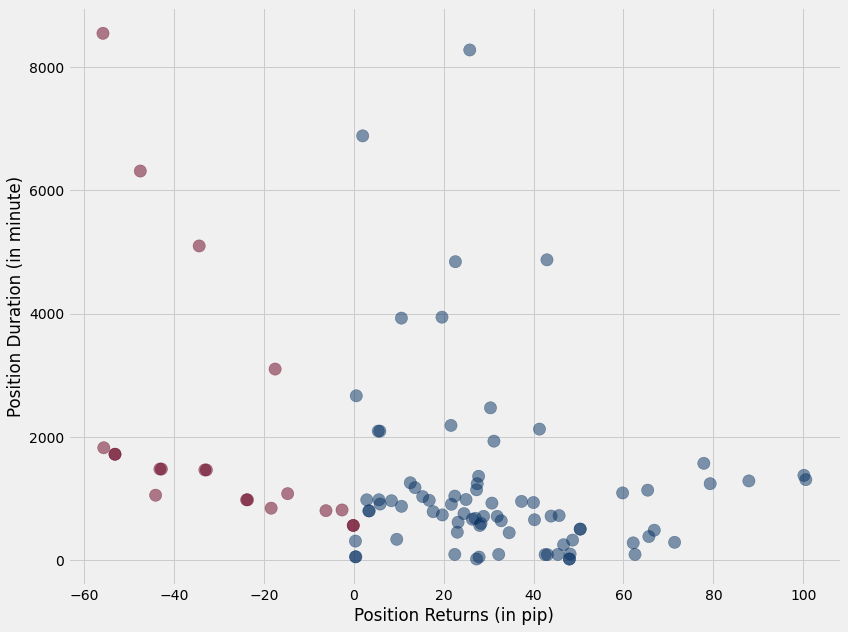

In [11]:
Rplusminus = Darwin.R_plus_minus(test_data) 

plt.figure(figsize=(12,9))
Rplusminus.plot
plt.show()

In [13]:
Rplusminus.Duration_data

,Position Duration (in minute),Position Returns (in pip)
0,55.38,27.879385
1,94.77,42.567022
2,94.83,43.092150
3,97.88,45.399738
4,105.00,48.125819
...,...,...
94,8547.78,-55.802807
95,8277.78,25.807328
96,1035.00,15.338699
97,2097.72,5.441901


# Capacity

In [14]:
capacity = Darwin.Capacity(dataframe=test_data,Max_Slippage=25)
capacity.Returns_Capacity

,Max_Slippage,1/2 Max_Slippage,1/4 Max_Slippage,1/5 Max_Slippage,Position Returns (in pip)
0,2.879385,15.379385,21.629385,22.879385,27.879385
1,17.567022,30.067022,36.317022,37.567022,42.567022
2,18.092150,30.592150,36.842150,38.092150,43.092150
3,20.399738,32.899738,39.149738,40.399738,45.399738
4,23.125819,35.625819,41.875819,43.125819,48.125819
...,...,...,...,...,...
94,-80.802807,-68.302807,-62.052807,-60.802807,-55.802807
95,0.807328,13.307328,19.557328,20.807328,25.807328
96,-9.661301,2.838699,9.088699,10.338699,15.338699
97,-19.558099,-7.058099,-0.808099,0.441901,5.441901


<AxesSubplot:>

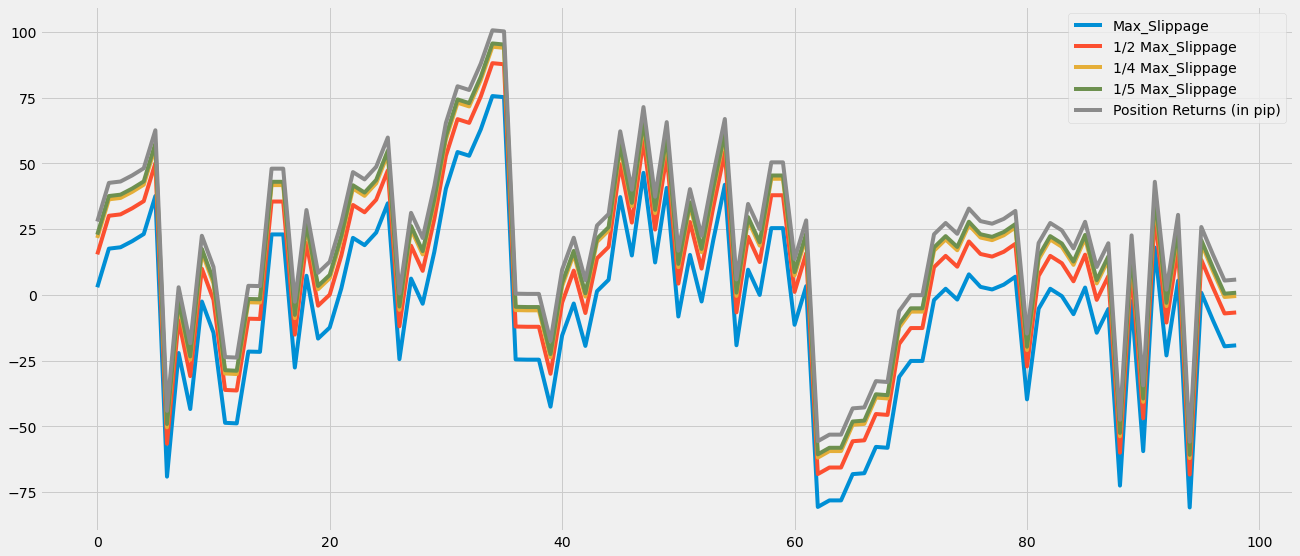

In [15]:
capacity.Returns_Capacity.plot(figsize=(20,9))

# loss_Aversion

<AxesSubplot:>

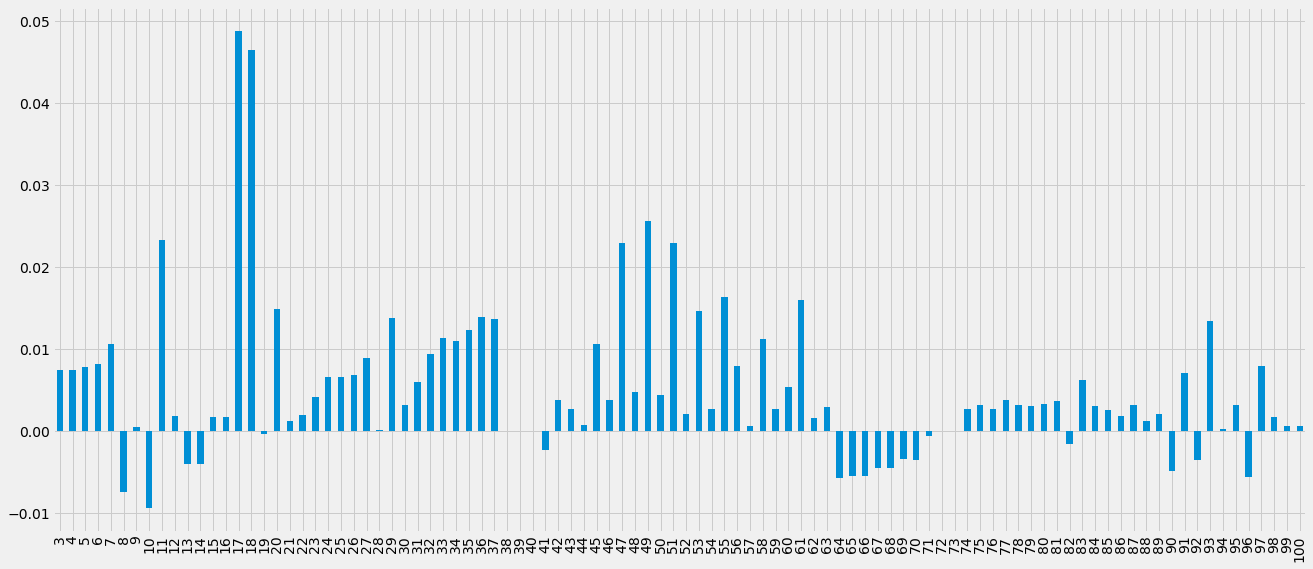

In [22]:
lossAversion = Darwin.Loss_Aversion(test_data)

lossAversion.LossAversion.plot.bar(figsize=(20,9))

# Market Correlation 

In [8]:
Market_corr = Darwin.Market_Correlation(
    trading_data=test_data,
    start_date=pd.to_datetime('2020-07-28 14:30:01'),
    end_date= pd.to_datetime('2020-09-02 05:30:00'),
    Experience=12
)

Market_corr.portfolio_return
Market_corr.correlation

,correlation,Weight
AUDNZD,0.0332,0.168675
NZDCAD,0.224377,0.626506
AUDCAD,0.288899,0.204819


# Experience

In [9]:
Exper = Darwin.Experience(
    dataframe= test_data
)

In [15]:
Exper.Representative_list

[3.8113675746669577,
 3.8113675746669577,
 4.998965364162517,
 4.587237264109293,
 4.8285393103548495,
 6.015583264833794,
 7.074365778414633,
 4.429509282829705,
 5.005240290538579]

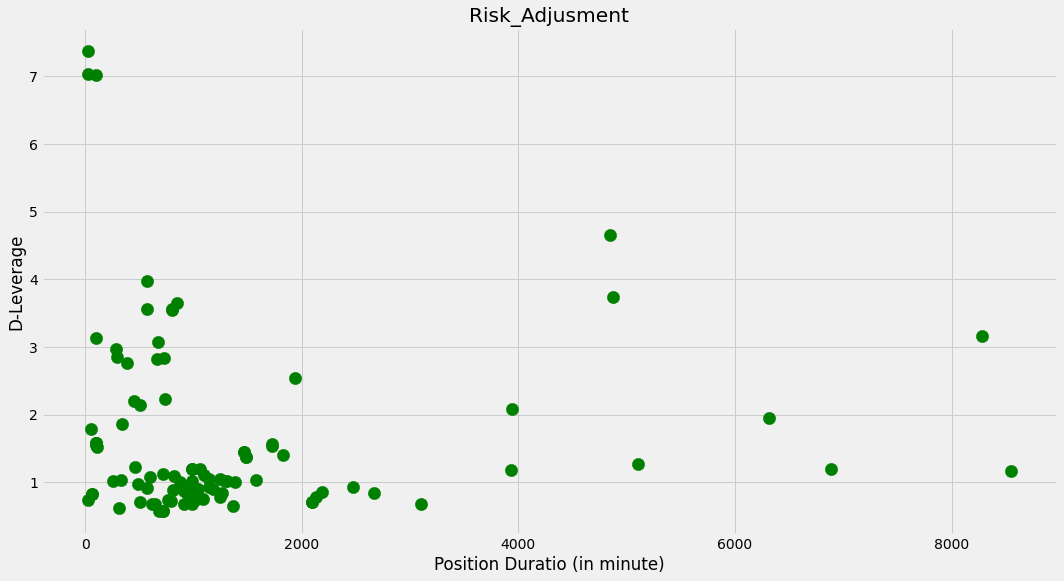

In [36]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
plt.scatter(
    x = Exper.D_Leverage_Duration.loc[:,'Position Duration'],
    y = Exper.D_Leverage_Duration.loc[:,'D-Leverage'],
    s=150,
    c = 'g'
)
plt.xlabel('Position Duratio (in minute)')
plt.ylabel('D-Leverage')
plt.tight_layout()
plt.title('Risk_Adjusment')
plt.show()

# Open / Close Strategy

Plot Unit Options:
    - 'per_trade': trade number
    - 'S': Second
    - 'T': Minute
    - 'H': Hour
    - 'D': Day
    - 'W': Week
    - 'M': Month

In [3]:
oscs = Darwin.OS_CS(trading_data=test_data[:100], window_periods=100, plot_unit='per_trade')

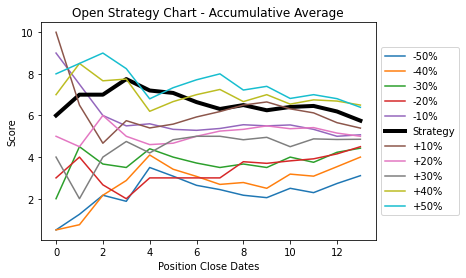

In [4]:
# plt.figure(figsize=(15,9))
oscs.plot_open_strategy

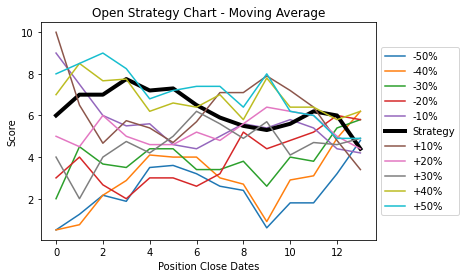

In [5]:
# plt.figure(figsize=(15,9))
oscs.plot_open_strategy_moving_average

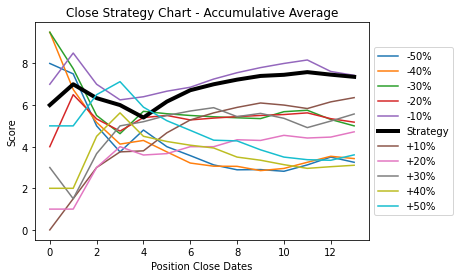

In [6]:
# plt.figure(figsize=(15,9))
oscs.plot_close_strategy

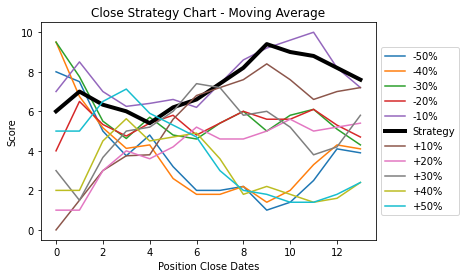

In [7]:
# plt.figure(figsize=(15,9))
oscs.plot_close_strategy_moving_average

In [8]:
oscs.final_open_score, oscs.final_close_score

(5.75, 7.357142857142857)

# Risk Stability

C:\Users\OMID YOUSEFI\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


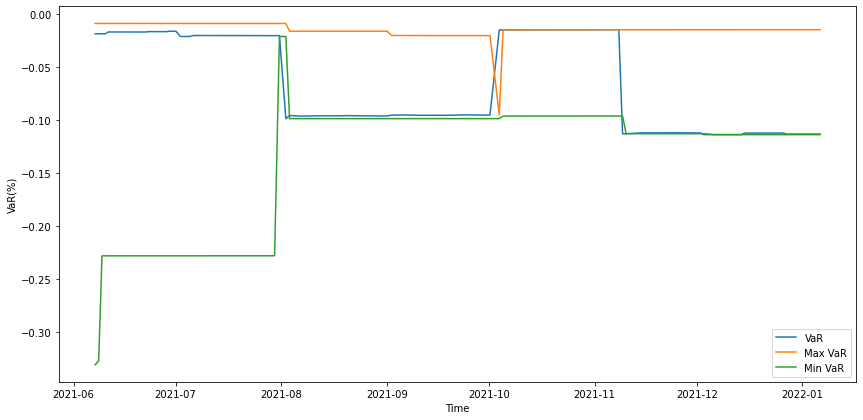

In [3]:
from Evaluation_Attributes.__Risk_Stability  import Risk_Stability
VaR_ = Risk_Stability(trading_data=test_data )
VaR_.plot_VaR